# Multiple Linear Regression with sklearn - Exercise Solution

You are given a real estate dataset. 

Real estate is one of those examples that every regression course goes through as it is extremely easy to understand and there is a (almost always) certain causal relationship to be found.

The data is located in the file: 'real_estate_price_size_year.csv'. 

You are expected to create a multiple linear regression (similar to the one in the lecture), using the new data. 

Apart from that, please:
-  Display the intercept and coefficient(s)
-  Find the R-squared and Adjusted R-squared
-  Compare the R-squared and the Adjusted R-squared
-  Compare the R-squared of this regression and the simple linear regression where only 'size' was used
-  Using the model make a prediction about an apartment with size 750 sq.ft. from 2009
-  Find the univariate (or multivariate if you wish - see the article) p-values of the two variables. What can you say about them?
-  Create a summary table with your findings

In this exercise, the dependent variable is 'price', while the independent variables are 'size' and 'year'.

Good luck!

## IMPORT PYTHON LIBRALIES || DEFAULT SETTING

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_regression

In [2]:
# DEFAULT SETTING (SEED, PARAMETER LIB)
sns.set()

## Exploratory Data Analysis & Data preprocessing & Feature Engineering

In [3]:
data = pd.read_csv('real_estate_price_size_year.csv')

### Basic Exploration

In [4]:
display('Shape of Data', data.shape)
display('Type of Feature', data.dtypes)

'Shape of Data'

(100, 3)

'Type of Feature'

price    float64
size     float64
year       int64
dtype: object

In [5]:
display("Statistic of numeric features", data.describe())

'Statistic of numeric features'

,price,size,year
count,100.000000,100.000000,100.000000
mean,292289.470160,853.024200,2012.600000
std,77051.727525,297.941951,4.729021
min,154282.128000,479.750000,2006.000000
25%,234280.148000,643.330000,2009.000000
50%,280590.716000,696.405000,2015.000000
75%,335723.696000,1029.322500,2018.000000
max,500681.128000,1842.510000,2018.000000


In [6]:
display('Missing Value in each Columns')
display(data.isnull().sum(axis=0)/len(data)*100)

'Missing Value in each Columns'

price    0.0
size     0.0
year     0.0
dtype: float64

In [7]:
input_features = data[['size','year']]
targets = data[['price']]

In [8]:
display(input_features.head(5), targets.head(5))

,size,year
0,643.09,2015
1,656.22,2009
2,487.29,2018
3,1504.75,2015
4,1275.46,2009


,price
0,234314.144
1,228581.528
2,281626.336
3,401255.608
4,458674.256


<AxesSubplot:xlabel='year', ylabel='count'>

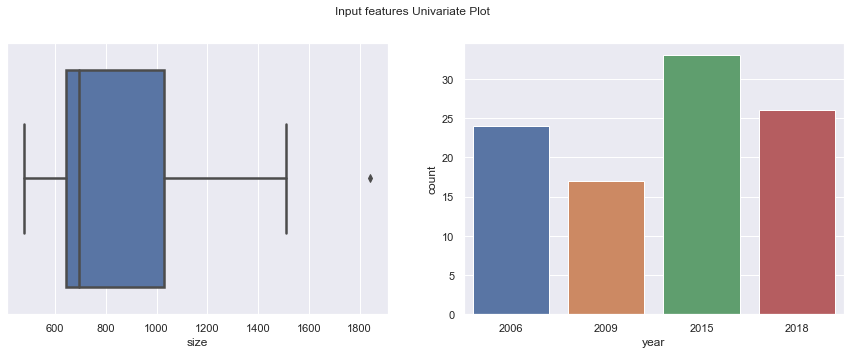

In [9]:
# Univariate Analysis
fig, ax = plt.subplots(1, 2, figsize=(15,5))
fig.suptitle('Input features Univariate Plot')
sns.boxplot(x=input_features['size'], linewidth=2.5, ax=ax[0])
sns.countplot(x=input_features['year'], ax=ax[1])


In [1]:
# Bivariate Analysis
# Scatterplot from each input feature to target
fig, ax = plt.subplots(1, 3, figsize=(30,7))
fig.suptitle('Scatterplot of each input vs target')
for i, feature in enumerate(input_features.columns):
    sns.scatterplot(x=input_features[feature], y=targets['price'], ax=ax[i])
sns.scatterplot(x=input_features['size'], y=targets['price'], hue=input_features['year'], palette='deep', ax=ax[-1])

NameError: name 'plt' is not defined

### Standardization

In [11]:
scaler = StandardScaler()
scaler.fit(input_features)

StandardScaler()

In [12]:
input_features_scaled = scaler.transform(input_features)

In [13]:
display(input_features_scaled)

array([[-0.70816415,  0.51006137],
       [-0.66387316, -0.76509206],
       [-1.23371919,  1.14763808],
       [ 2.19844528,  0.51006137],
       [ 1.42498884, -0.76509206],
       [-0.937209  , -1.40266877],
       [-0.95171405,  0.51006137],
       [-0.78328682, -1.40266877],
       [-0.57603328,  1.14763808],
       [-0.53467702, -0.76509206],
       [ 0.69939906, -0.76509206],
       [ 3.33780001, -0.76509206],
       [-0.53467702,  0.51006137],
       [ 0.52699137,  1.14763808],
       [ 1.51100715, -1.40266877],
       [ 1.77668568, -1.40266877],
       [-0.54810263,  1.14763808],
       [-0.77276222, -1.40266877],
       [-0.58004747, -1.40266877],
       [ 0.58943055,  1.14763808],
       [-0.78365788,  0.51006137],
       [-1.02322731,  0.51006137],
       [ 1.19557293,  0.51006137],
       [-1.12884431,  0.51006137],
       [-1.10378093, -0.76509206],
       [ 0.84424715,  1.14763808],
       [-0.95171405,  1.14763808],
       [ 1.62279723,  0.51006137],
       [-0.58004747,

## Create the regression

### Regression model with normal input
#### $R^2_{adj.} = 1 - (1 - R^2) * \frac{n-1}{n-k-1} $

In [14]:
# Let's use the handy function we created
def adj_r2(x,y, model):
    r2 = model.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [15]:
model = LinearRegression()
model.fit(input_features,targets['price'])

LinearRegression()

In [16]:
display('Model Intercept', model.intercept_)
display('Model Coefficient', model.coef_)
display('Model R^2', model.score(input_features,targets))
display('Model R^2(adj.)', adj_r2(input_features, targets, model))

'Model Intercept'

-5772267.017463277

'Model Coefficient'

array([ 227.70085401, 2916.78532684])

'Model R^2'

0.7764803683276793

'Model R^2(adj.)'

0.77187171612825

In [17]:
p_values = f_regression(input_features,targets['price'])[1]
p_values.round(5)
model_summary = pd.DataFrame(data = input_features.columns.values, columns=['Features'])
model_summary['Coefficients'] = model.coef_
model_summary['p-values'] = p_values.round(3)
model_summary

,Features,Coefficients,p-values
0,size,227.700854,0.000
1,year,2916.785327,0.357


### Scaled by Standardization Model (model_scaled)

In [18]:
model_scaled = LinearRegression()
model_scaled.fit(input_features_scaled,targets['price'])

LinearRegression()

In [19]:
display('Model Intercept', model_scaled.intercept_)
display('Model Coefficient', model_scaled.coef_)
display('Model R^2', model_scaled.score(input_features_scaled,targets))
display('Model R^2(adj.)', adj_r2(input_features_scaled, targets, model_scaled))


'Model Intercept'

292289.4701599997

'Model Coefficient'

array([67501.57614152, 13724.39708231])

'Model R^2'

0.7764803683276793

'Model R^2(adj.)'

0.77187171612825

In [20]:
p_values_scaled = f_regression(input_features_scaled,targets['price'])[1]
p_values_scaled.round(5)
model_summary_scaled = pd.DataFrame(data = input_features.columns.values, columns=['Features'])
model_summary_scaled['Coefficients'] = model_scaled.coef_
model_summary_scaled['p-values'] = p_values_scaled.round(3)
model_summary_scaled

,Features,Coefficients,p-values
0,size,67501.576142,0.000
1,year,13724.397082,0.357


### Making predictions

Find the predicted price of an apartment that has a size of 750 sq.ft. from 2009.

In [27]:
new_data = pd.DataFrame({'size':[750,500],'year':[2009,2010]})
display(new_data)
results = model.predict(new_data)
new_data['Predicted'] = results
display(new_data)

,size,year
0,750,2009
1,500,2010


,size,year,Predicted
0,750,2009,258330.344660
1,500,2010,204321.916485


In [29]:
new_data_2 = pd.DataFrame({'size':[750,500],'year':[2009,2010]})
new_data_scaled = scaler.transform(new_data_2)
results_2 = model_scaled.predict(new_data_scaled)
display(results_2)

array([258330.34465995, 204321.91648491])